# Student Predictions - Regression

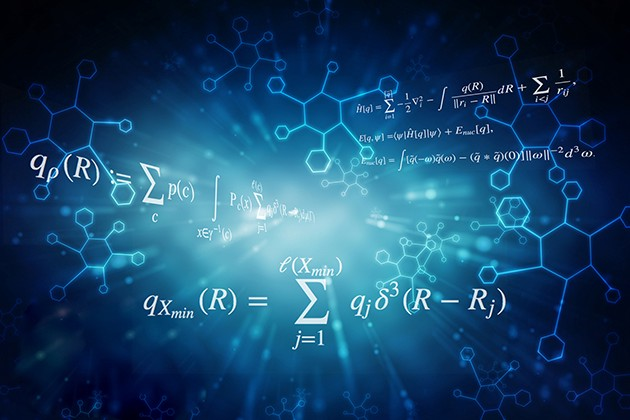

## Problem Statement

Can we predict students' performance in academics in STEM and Non-STEM?
<br>
Is there a difference in STEM and NON-STEM when looking at the performance of students and their features?



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning) # ignore future warnings

In [2]:
math_df = pd.read_csv(r'student-mat.csv', sep=';')
por_df = pd.read_csv(r'student-por.csv', sep=';')

In [3]:
math_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
por_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


## Data Wrangling and Visualization of the dataset

<ol>
    <li>Filling in missing data</li>
    <li>Smoothing-out noisy data</li>
    <li>Removing outliers and artifacts</li>
    <li>Correcting inconsistent data</li>
    <li>Removing duplicate data</li>
</ol>

## Check for missing values

There seems to be no missing values in the math data set or the poruese language dataset. 

In [5]:
math_df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [6]:
por_df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

## Check for dulicated values

There are no duplicated values in either of the datasets, so we can move onto the next step.

In [7]:
math_df[math_df.duplicated(keep=False)]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3


In [8]:
por_df[por_df.duplicated(keep=False)]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3


## Histograms of datasets

Many of the histograms are tail heavy, which may impact the performance of the ML alogorithms. We can adjust this to a more bell shaped curve transforming some of the features. The range of values goes from 0 - 500 in most feature spaces. There is not a major need for feature scaling.

### Math Dataset

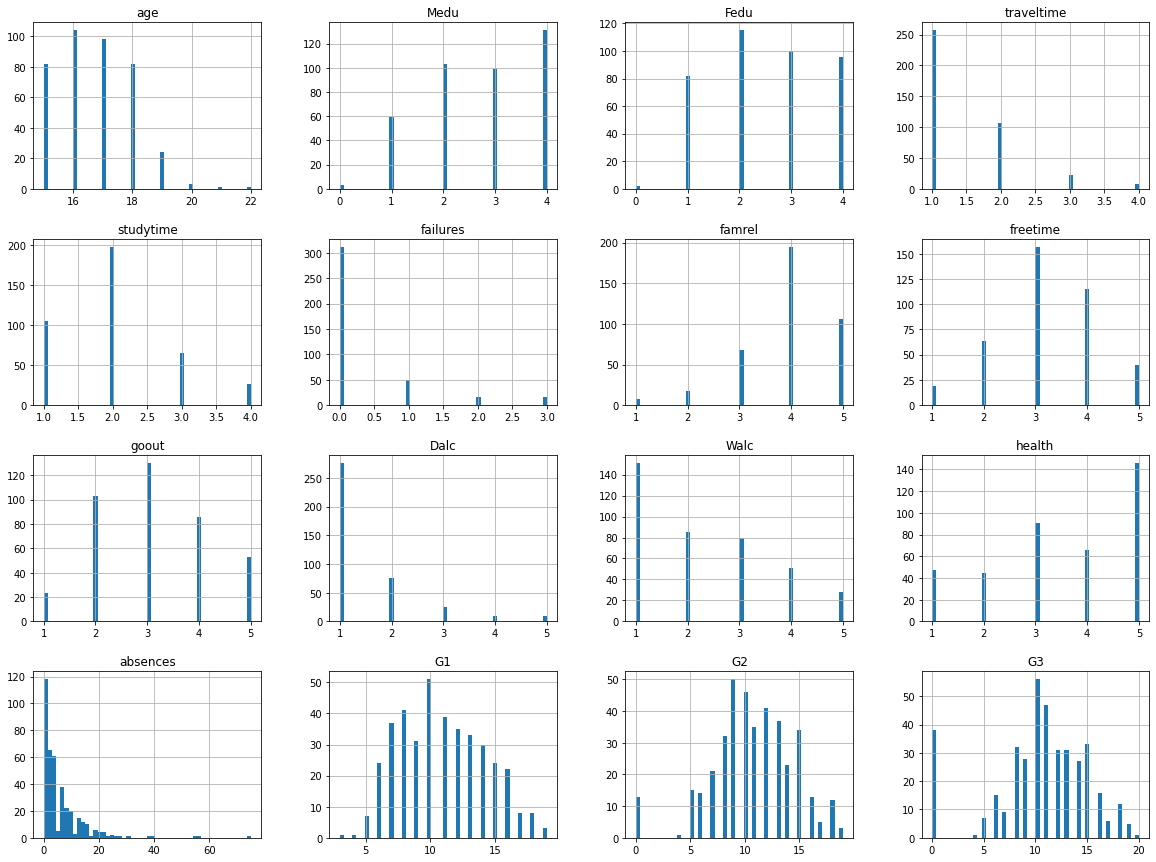

In [9]:
%matplotlib inline 
math_df.hist(bins = 50, figsize = (20, 15))
plt.show()

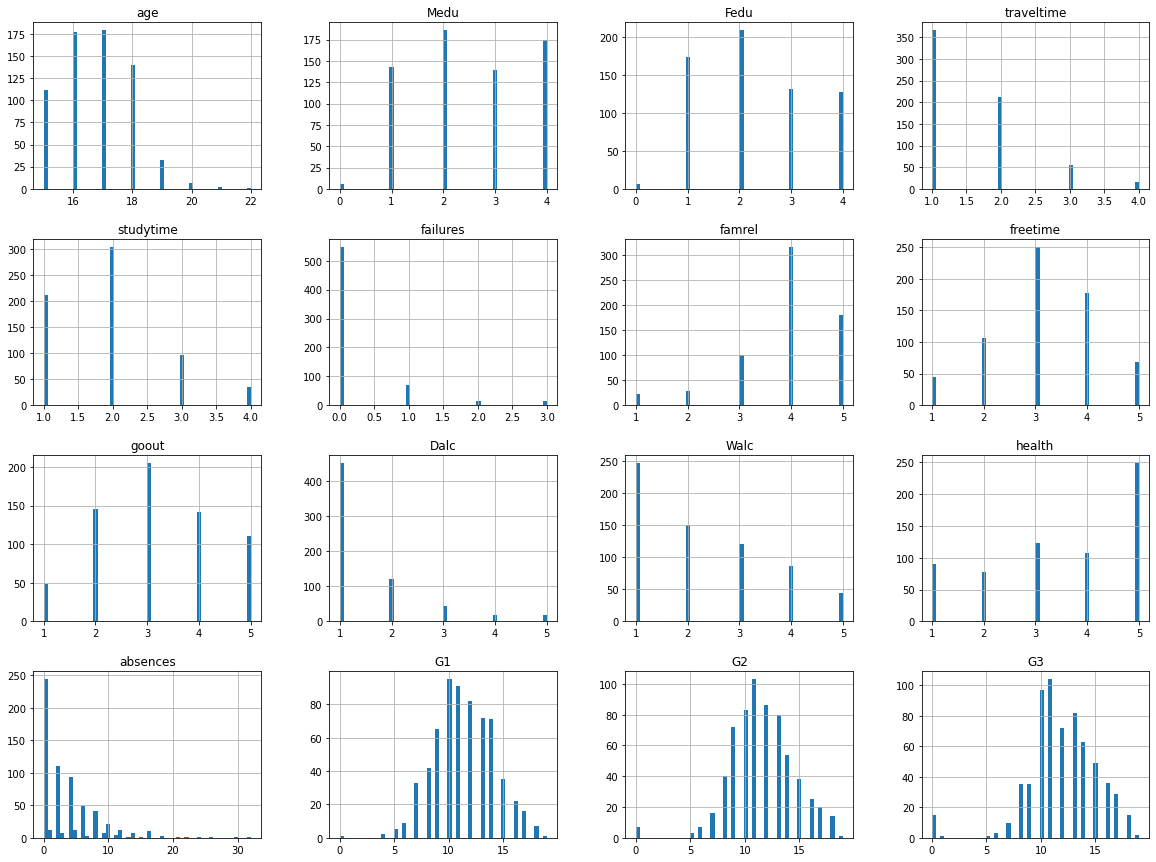

In [10]:
%matplotlib inline 
por_df.hist(bins = 50, figsize = (20, 15))
plt.show()

## Create a Test Set

In [11]:
train_set, test_set = train_test_split(math_df, test_size = 0.2, random_state = 42)

## Look for Correlations in the dataset

The distribution plot of the target variable grades shows it is slightly left skewed. It seems they're might be an outlier with students with a 0 in they're grades. G1, G2 and G3 are highly positvely correlated with each other which makes sense they are first period and second period grades. Fathers and mothers education are also highly positvely correlated with each other. Workday alcohol consumption and weekday alcohol consumption are also highly positvely correlated together. Weekly alcohol content and going out with friends are also highly correlated with each other. Since we have workday and weekend alcohol consumtion, we can remove one of these as they tend to correlate at a greater extent to other features and they are similar. 

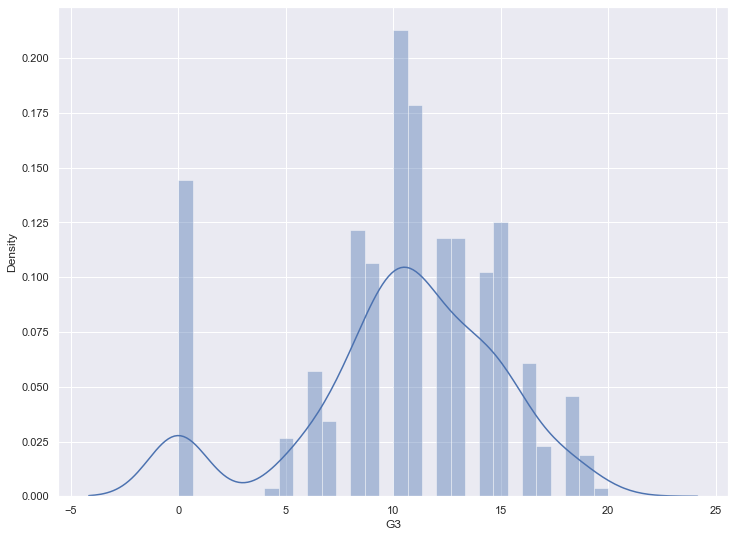

<AxesSubplot:>

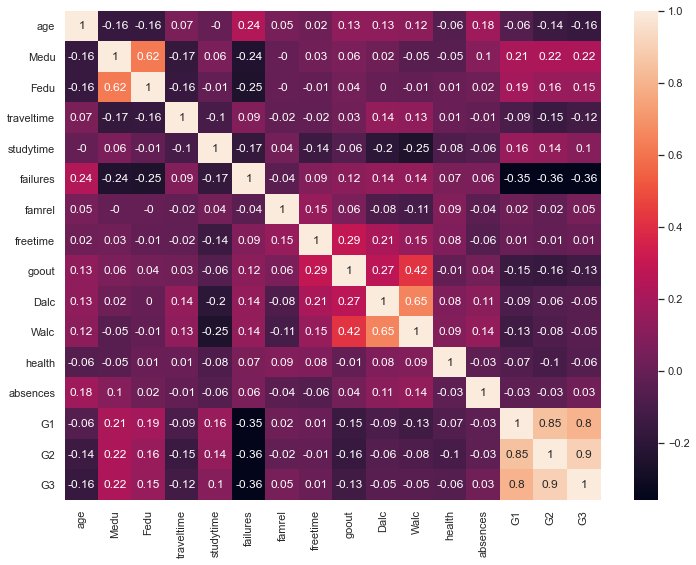

In [12]:
sns.set(rc = {'figure.figsize': (12, 9)})
sns.distplot(math_df['G3'], bins=30)
plt.show()
corr_matrix = math_df.corr().round(2)
sns.heatmap(corr_matrix, annot = True)

## Check the data types of each feature

In [13]:
math_df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [14]:
por_df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

## Use one hot encoding to change categorical data

After looking at the data types for the two datasets, we can see that there are data types that are generic objects. These represent cateogirical variables that would need to be encoded for our regression models. Features to change are:

<ol>
    <li>school</li>
    <li>sex</li>
    <li>address</li>
    <li>famsize</li>
    <li>Pstatus</li>
    <li>Mjob</li>
    <li>Fjob</li>
    <li>reason</li>
    <li>guardian</li>
    <li>schoolsup</li>
    <li>famsup</li>
    <li>paid</li>
    <li>activities</li>
    <li>nursery</li>
    <li>higher</li>
    <li>internet</li>
    <li>romantic</li>    
</ol>

In [15]:
math_df_encoded = math_df.copy()
labelencoder = LabelEncoder()
math_df_encoded['school_dummy'] = labelencoder.fit_transform(math_df_encoded["school"])
math_df_encoded['sex_dummy'] = labelencoder.fit_transform(math_df_encoded["sex"])
math_df_encoded['address_dummy'] = labelencoder.fit_transform(math_df_encoded["address"])
math_df_encoded['famsize_dummy'] = labelencoder.fit_transform(math_df_encoded["famsize"])
math_df_encoded['pstatus_dummy'] = labelencoder.fit_transform(math_df_encoded["Pstatus"])
math_df_encoded['fjob_dummy'] = labelencoder.fit_transform(math_df_encoded["Fjob"])
math_df_encoded['mjob_dummy'] = labelencoder.fit_transform(math_df_encoded["Mjob"])
math_df_encoded['reason_dummy'] = labelencoder.fit_transform(math_df_encoded["reason"])
math_df_encoded['guardian_dummy'] = labelencoder.fit_transform(math_df_encoded["guardian"])
math_df_encoded['schoolsup_dummy'] = labelencoder.fit_transform(math_df_encoded["schoolsup"])
math_df_encoded['famsup_dummy'] = labelencoder.fit_transform(math_df_encoded["famsup"])
math_df_encoded['paid_dummy'] = labelencoder.fit_transform(math_df_encoded["paid"])
math_df_encoded['activities_dummy'] = labelencoder.fit_transform(math_df_encoded["activities"])
math_df_encoded['nursery_dummy'] = labelencoder.fit_transform(math_df_encoded["nursery"])
math_df_encoded['higher_dummy'] = labelencoder.fit_transform(math_df_encoded["higher"])
math_df_encoded['internet_dummy'] = labelencoder.fit_transform(math_df_encoded["internet"])
math_df_encoded['romantic_dummy'] = labelencoder.fit_transform(math_df_encoded["romantic"])

In [16]:
cleaned_math_df = math_df_encoded[["school_dummy", "sex_dummy", "age", "address_dummy", "famsize_dummy", 
                                  "pstatus_dummy", "Medu", "Fedu", "mjob_dummy", "fjob_dummy", 
                                  "reason_dummy", "guardian_dummy", "traveltime", "studytime", 
                                  "failures", "schoolsup_dummy", "famsup_dummy", "paid_dummy", 
                                  "activities_dummy", "nursery_dummy", "higher_dummy", "internet_dummy", 
                                  "romantic_dummy", "famrel", "freetime", "goout", "Walc",
                                  "health", "absences", "G1", "G2", "G3"]]
cleaned_math_df

,school_dummy,sex_dummy,age,address_dummy,famsize_dummy,pstatus_dummy,Medu,Fedu,mjob_dummy,fjob_dummy,...,romantic_dummy,famrel,freetime,goout,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,0,4,3,4,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,0,5,3,3,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,0,4,3,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,1,3,2,2,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,0,4,3,2,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,1,1,0,2,2,3,3,...,0,5,5,4,5,4,11,9,9,9
391,1,1,17,1,1,1,3,1,3,3,...,0,2,4,5,4,2,3,14,16,16
392,1,1,21,0,0,1,1,1,2,2,...,0,5,5,3,3,3,3,10,8,7
393,1,1,18,0,1,1,3,2,3,2,...,0,4,4,1,4,5,0,11,12,10


## Create a training and test set

In [17]:
train_set, test_set = train_test_split(cleaned_math_df, test_size = 0.2, random_state = 42)

## Select and train the model

### Ridge Regression

In [18]:
X_train, y_train = train_set.iloc[:,:-1], train_set.iloc[:,-1]
model = Ridge(alpha = 0.5, solver = "cholesky")
model.fit(X_train, y_train)

Ridge(alpha=0.5, solver='cholesky')

In [19]:
kf = KFold(n_splits=10, random_state=None)
result = cross_val_score(model , X_train, y_train, cv = kf)
print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: 0.8185373726760293


### Fine tuning the model using grid search and k fold cross validation 

In [20]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
model = RidgeCV(alphas=np.arange(0, 1, 0.01), cv=cv, scoring='neg_mean_absolute_error')
model.fit(X_train, y_train)
print("alpha: %f", model.alpha_)

alpha: %f 0.99


In [21]:
X_test, y_test = test_set.iloc[:,:-1], test_set.iloc[:,-1]
y_pred = model.predict(X_test)

### Metrics

In [22]:
print("------------ Metrics from Ridge Regression model -------------")
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, y_pred)))

------------ Metrics from Ridge Regression model -------------
Mean Absolute Error:  1.4795796234533658
Mean Squared Error:  5.021702096780747
Root Mean Squared Error:  2.240915459534506


# Predicting Passing Grades

In [23]:
from sklearn import tree
import matplotlib.pyplot as plt
import graphviz
import pydotplus
from IPython.display import Image
import tensorflow as tf
from tensorflow import keras
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve

In [24]:
def metrics(test_data, predictions, model_name, metrics_data, g1_g2):
    accuracy = accuracy_score(test_data, predictions)
    print('Accuracy:', accuracy)
    precision = precision_score(test_data, predictions)
    print('Precision:', precision)
    recall = recall_score(test_data, predictions)
    print('Recall:', recall)
    f1 = f1_score(y_test, y_pred)
    print('F1 Score', f1)
    print('Classification Report:')
    print(classification_report(test_data, predictions, target_names=['pass', 'fail']))
    print('Confusion Matrix:')
    print(confusion_matrix(test_data, predictions))
    return metrics_data.append({'model' : model_name, 'accuracy' : accuracy, 'precision' : precision, 
                                'recall' : recall, 'f1 score' : f1, 'includes G1/G2' : g1_g2}, ignore_index=True)

In [25]:
metrics_df = pd.DataFrame(columns=['model', 'accuracy', 'precision', 'recall', 'f1 score', 'includes G1/G2'])
metrics_df

,model,accuracy,precision,recall,f1 score,includes G1/G2


## Load the dataset, handle data

Here we load the datasets for the two classes and merge them into one. A 'passed' column is created based on G3 (final) scores that indicates whether a student passed their class. The G3 column is then dropped, as that data is the basis for whether or not the student passed. 

In [26]:
dfs = [math_df, por_df]
data = pd.concat(dfs)
data['passed'] = 1
data.loc[data['G3'] >= 10,'passed'] = 0
data = data.drop(columns=['G3'])
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,1
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,1
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,0
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,0
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,0
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,0
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,1
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,0


## Use one hot encoding to change categorical data

Here we once again use one hot encoding to pass numerical values instead of other data types. New dummy columns are created for features that are non-ordinal and categorical such that they are appropriately handled by the classifiers.

In [27]:
data_with_dummies = pd.get_dummies(data, columns = ['Mjob', 'Fjob', 'reason', 'guardian'])

In [28]:
data_encoded = data_with_dummies.copy()
labelencoder = LabelEncoder()
data_encoded['school_dummy'] = labelencoder.fit_transform(data["school"])
data_encoded['sex_dummy'] = labelencoder.fit_transform(data["sex"])
data_encoded['address_dummy'] = labelencoder.fit_transform(data["address"])
data_encoded['famsize_dummy'] = labelencoder.fit_transform(data["famsize"])
data_encoded['pstatus_dummy'] = labelencoder.fit_transform(data["Pstatus"])
data_encoded['schoolsup_dummy'] = labelencoder.fit_transform(data["schoolsup"])
data_encoded['famsup_dummy'] = labelencoder.fit_transform(data["famsup"])
data_encoded['paid_dummy'] = labelencoder.fit_transform(data["paid"])
data_encoded['activities_dummy'] = labelencoder.fit_transform(data["activities"])
data_encoded['nursery_dummy'] = labelencoder.fit_transform(data["nursery"])
data_encoded['higher_dummy'] = labelencoder.fit_transform(data["higher"])
data_encoded['internet_dummy'] = labelencoder.fit_transform(data["internet"])
data_encoded['romantic_dummy'] = labelencoder.fit_transform(data["romantic"])
data_encoded.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'passed', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services',
       'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other',
       'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home',
       'reason_other', 'reason_reputation', 'guardian_father',
       'guardian_mother', 'guardian_other', 'school_dummy', 'sex_dummy',
       'address_dummy', 'famsize_dummy', 'pstatus_dummy', 'schoolsup_dummy',
       'famsup_dummy', 'paid_dummy', 'activities_dummy', 'nursery_dummy',
       'higher_dummy', 'internet_dummy', 'romantic_dummy'],
      dtype='object')

In [29]:
data = data_encoded[["school_dummy", "sex_dummy", "age", "address_dummy", "famsize_dummy", 
                     "pstatus_dummy", "Medu", "Fedu", "traveltime", "studytime", 
                     "failures", "schoolsup_dummy", "famsup_dummy", "paid_dummy", 
                     "activities_dummy", "nursery_dummy", "higher_dummy", "internet_dummy", 
                     "romantic_dummy", "famrel", "freetime", "goout", "Walc",
                      "health", "absences", "G1", "G2", 'Fjob_at_home', 'Fjob_health', 'Fjob_other',
                     'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home',
                     'reason_other', 'reason_reputation', 'guardian_father',
                     'guardian_mother', 'guardian_other', "passed"]]
data

,school_dummy,sex_dummy,age,address_dummy,famsize_dummy,pstatus_dummy,Medu,Fedu,traveltime,studytime,...,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,passed
0,0,0,18,1,0,0,4,4,2,2,...,0,1,1,0,0,0,0,1,0,1
1,0,0,17,1,0,1,1,1,1,2,...,0,0,1,0,0,0,1,0,0,1
2,0,0,15,1,1,1,1,1,1,2,...,0,0,0,0,1,0,0,1,0,0
3,0,0,15,1,0,1,4,2,1,3,...,1,0,0,1,0,0,0,1,0,0
4,0,0,16,1,0,1,3,3,1,2,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,0,19,0,0,1,2,3,1,3,...,0,0,1,0,0,0,0,1,0,0
645,1,0,18,1,1,1,3,1,1,2,...,1,0,1,0,0,0,0,1,0,0
646,1,0,18,1,0,1,1,1,2,2,...,0,0,1,0,0,0,0,1,0,1
647,1,1,17,1,1,1,3,1,2,1,...,1,0,1,0,0,0,0,1,0,0


## Create train and test sets, correct data imbalance with SMOTE

Here the data is processed into X (input data) and y (target feature). Checking the value counts of the target feature revealed a large imbalance in the data, in which students who passed the class made up approximately 78% of the data. Accordingly, SMOTE (Synthetic Minority Oversampling Technique) was leveraged to correct this imbalance by creating synthetic samples based on the data of the minority class. Train and test sets were then derived from the X and y sets in order for the algorithms to be run.

In [30]:
X = data.iloc[:, np.r_[0:39]]
y = data['passed']

In [31]:
y.value_counts(ascending=True)

1    230
0    814
Name: passed, dtype: int64

In [32]:
sm = SMOTE(sampling_strategy='auto')
X, y = sm.fit_resample(X, y)

In [33]:
y.value_counts(ascending=True)

0    814
1    814
Name: passed, dtype: int64

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

In [35]:
y_train = y_train.astype('int')
y_test = y_test.astype('int')
X_train = X_train.astype('int')
X_test = X_test.astype('int')

## Decision Tree

A decision tree classifier is a type of machine learning model that predicts outcome classes by filtering input features into a decision tree in attempt to predict the output feature. They may be of use here because they are known to be useful with categorical features, of which there are many in this dataset.

In [36]:
# helper function to print tree data
def printTreeData(model, train_x, train_y, test_x, test_y):
    print('Tree depth:', model.get_depth())
    print('Total leaves:', model.get_n_leaves())
    print('Feature importance:', model.feature_importances_)
    print('Train Score:', model.score(train_x, train_y))
    print('Test Score:', model.score(test_x, test_y))

In [37]:
model = tree.DecisionTreeClassifier().fit(X_train, y_train)
y_pred = model.predict(X_test)

In [38]:
print("******* Metrics for Decision Tree ***********")
metrics_df = metrics(y_test, y_pred, 'Decision Tree', metrics_df, True)

******* Metrics for Decision Tree ***********
Accuracy: 0.918918918918919
Precision: 0.9196428571428571
Recall: 0.9321266968325792
F1 Score 0.9258426966292135
Classification Report:
              precision    recall  f1-score   support

        pass       0.92      0.90      0.91       186
        fail       0.92      0.93      0.93       221

    accuracy                           0.92       407
   macro avg       0.92      0.92      0.92       407
weighted avg       0.92      0.92      0.92       407

Confusion Matrix:
[[168  18]
 [ 15 206]]


In [39]:
printTreeData(model, X_train, y_train, X_test, y_test)

Tree depth: 13
Total leaves: 65
Feature importance: [8.34176263e-03 0.00000000e+00 3.75755536e-03 1.00226076e-02
 3.33764199e-03 3.00547255e-03 1.35213902e-02 8.41081944e-03
 7.72027392e-03 7.83751214e-03 1.71811989e-02 2.36089210e-03
 0.00000000e+00 0.00000000e+00 2.45902300e-03 0.00000000e+00
 3.62724353e-03 0.00000000e+00 3.27869733e-03 1.25402018e-02
 3.07377875e-03 1.02866263e-02 2.10370142e-04 9.14661137e-03
 1.28999499e-02 1.18812769e-02 7.99515663e-01 3.37876147e-03
 0.00000000e+00 8.93400570e-03 1.27504896e-03 0.00000000e+00
 3.11895183e-03 8.03602286e-03 2.84153768e-03 5.90165519e-03
 4.87901388e-03 7.21843408e-03 0.00000000e+00]
Train Score: 1.0
Test Score: 0.918918918918919


### Display Tree

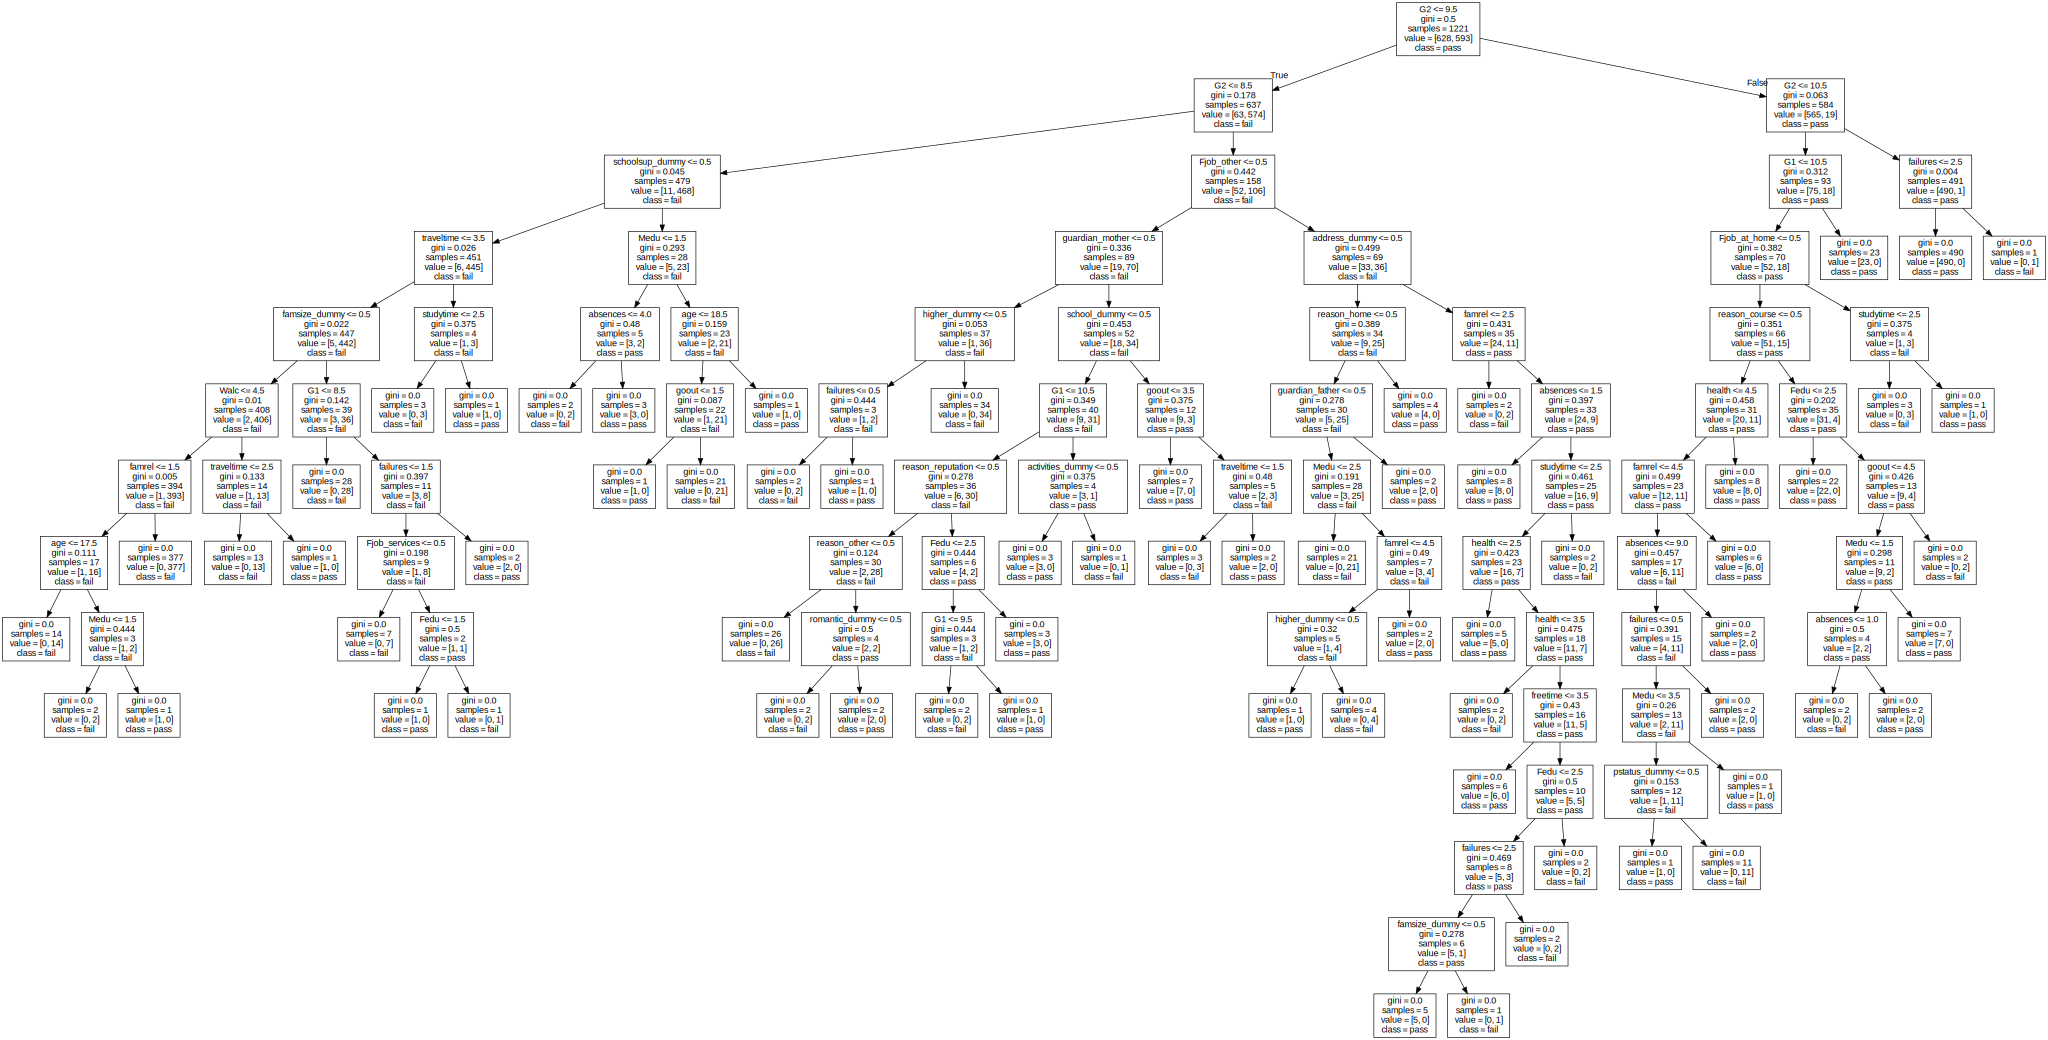

In [40]:
dot_data = tree.export_graphviz(model, feature_names=["school_dummy", "sex_dummy", "age", "address_dummy", "famsize_dummy", 
                     "pstatus_dummy", "Medu", "Fedu", "traveltime", "studytime", 
                     "failures", "schoolsup_dummy", "famsup_dummy", "paid_dummy", 
                     "activities_dummy", "nursery_dummy", "higher_dummy", "internet_dummy", 
                     "romantic_dummy", "famrel", "freetime", "goout", "Walc",
                      "health", "absences", "G1", "G2", 'Fjob_at_home', 'Fjob_health', 'Fjob_other',
                     'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home',
                     'reason_other', 'reason_reputation', 'guardian_father',
                     'guardian_mother', 'guardian_other'], class_names=['pass', 'fail'])
graph = graphviz.Source(dot_data)
graph

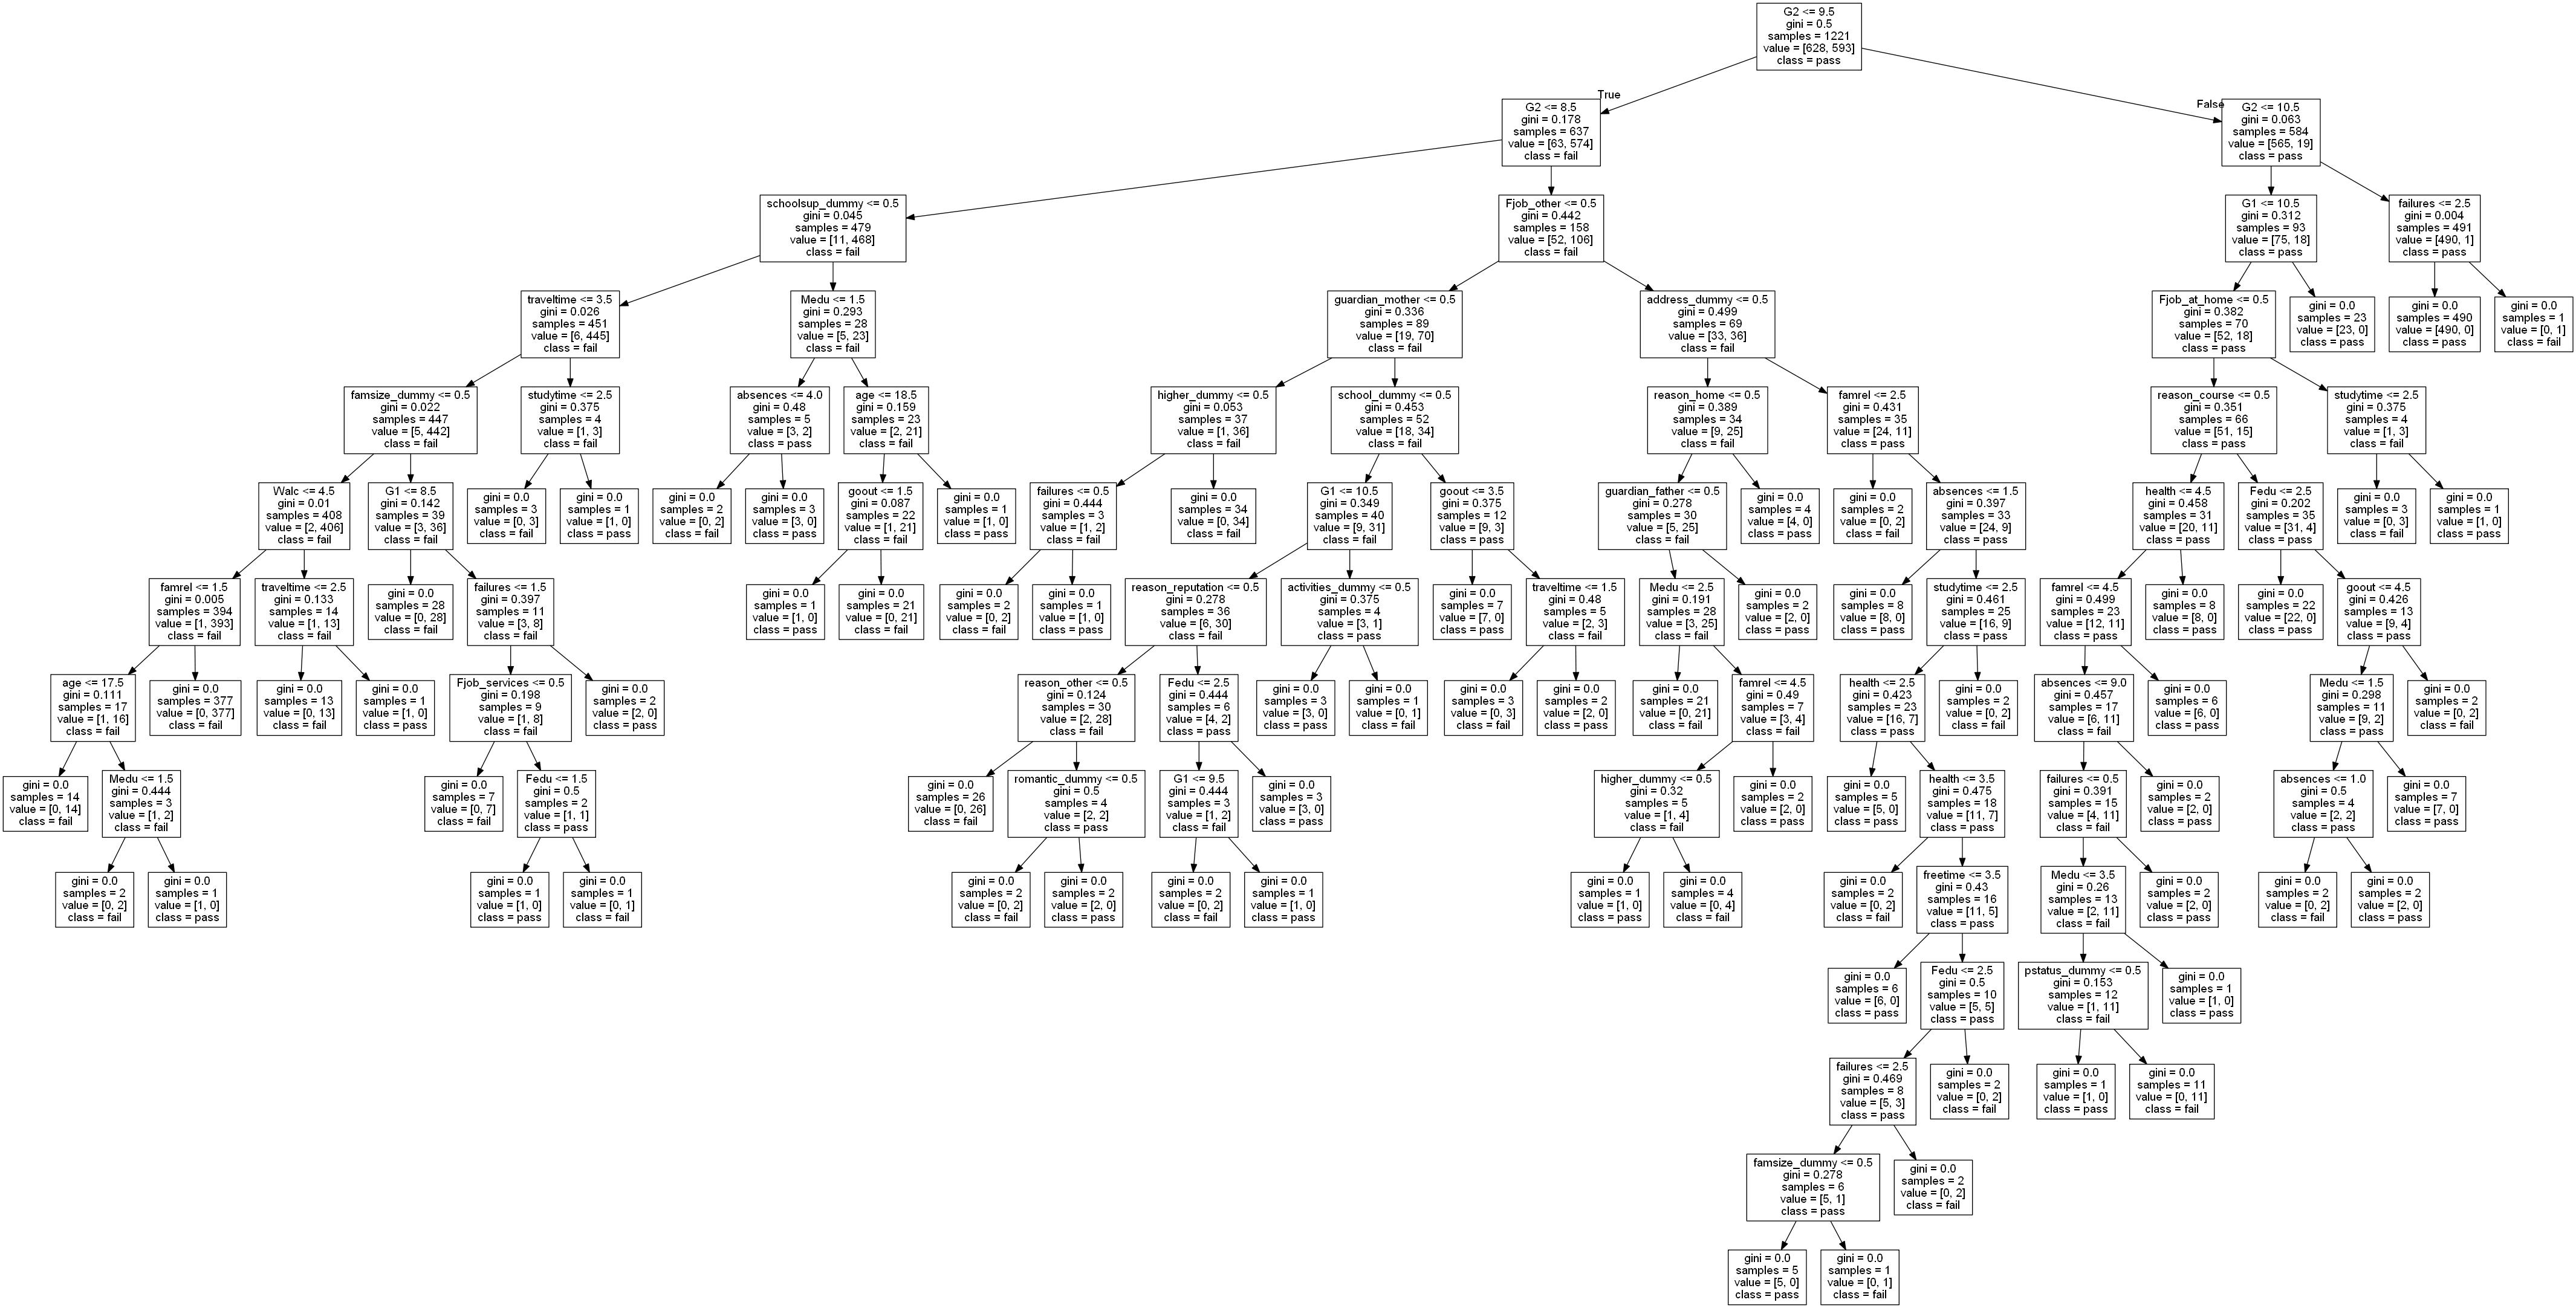

In [41]:
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## Nueral Network

A neural network is another type of classficiation model leveraged in data mining. The model is based on the brain, designed such that input nodes are connected to output (classification) node(s) via hidden nodes and "synapes" (edges). As the neural network is learning and synapses/edges are transpersed by the data, the weights change according to whether or not the data point was appropriately classified.

In [42]:
X_train_float = np.asarray(X_train).astype('float32')
y_train_float = np.asarray(y_train).astype('float32').reshape((-1,1))
X_test_float = np.asarray(X_test).astype('float32')
y_test_float = np.asarray(y_test).astype('float32').reshape((-1,1))

X_train_tensor = tf.convert_to_tensor(X_train_float)
y_train_tensor = tf.convert_to_tensor(y_train_float)
X_test_tensor = tf.convert_to_tensor(X_test)
y_test_tensor = tf.convert_to_tensor(y_test)

In [43]:
model = keras.Sequential([
    keras.layers.Dense(400, input_shape=(39,), activation='relu'),
    keras.layers.Dense(200, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='SGD',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train_tensor, y_train_tensor, epochs=250)
y_pred = model.predict_classes(X_test)

Epoch 1/250
39/39 [==============================] - 1s 1ms/step - loss: 0.5333 - accuracy: 0.7122
Epoch 2/250
39/39 [==============================] - 0s 1ms/step - loss: 0.2795 - accuracy: 0.8934
Epoch 3/250
39/39 [==============================] - 0s 1ms/step - loss: 0.2893 - accuracy: 0.8720
Epoch 4/250
39/39 [==============================] - 0s 1ms/step - loss: 0.2872 - accuracy: 0.8707
Epoch 5/250
39/39 [==============================] - 0s 1ms/step - loss: 0.2307 - accuracy: 0.9009
Epoch 6/250
39/39 [==============================] - 0s 1ms/step - loss: 0.2271 - accuracy: 0.8902
Epoch 7/250
39/39 [==============================] - 0s 1ms/step - loss: 0.2223 - accuracy: 0.8967
Epoch 8/250
39/39 [==============================] - 0s 1ms/step - loss: 0.2448 - accuracy: 0.9008
Epoch 9/250
39/39 [==============================] - 0s 1ms/step - loss: 0.2613 - accuracy: 0.8748
Epoch 10/250
39/39 [==============================] - 0s 1ms/step - loss: 0.3033 - accuracy: 0.8717
Epoch 11/

39/39 [==============================] - 0s 1ms/step - loss: 0.1444 - accuracy: 0.9312
Epoch 84/250
39/39 [==============================] - 0s 1ms/step - loss: 0.1614 - accuracy: 0.9340
Epoch 85/250
39/39 [==============================] - 0s 1ms/step - loss: 0.1747 - accuracy: 0.9083
Epoch 86/250
39/39 [==============================] - 0s 1ms/step - loss: 0.1501 - accuracy: 0.9366
Epoch 87/250
39/39 [==============================] - 0s 1ms/step - loss: 0.1559 - accuracy: 0.9224
Epoch 88/250
39/39 [==============================] - 0s 1ms/step - loss: 0.1495 - accuracy: 0.9347
Epoch 89/250
39/39 [==============================] - 0s 1ms/step - loss: 0.1592 - accuracy: 0.9377
Epoch 90/250
39/39 [==============================] - 0s 1ms/step - loss: 0.1533 - accuracy: 0.9381
Epoch 91/250
39/39 [==============================] - 0s 1ms/step - loss: 0.1387 - accuracy: 0.9406
Epoch 92/250
39/39 [==============================] - 0s 1ms/step - loss: 0.1406 - accuracy: 0.9389
Epoch 93/250


39/39 [==============================] - 0s 1ms/step - loss: 0.1985 - accuracy: 0.9306
Epoch 165/250
39/39 [==============================] - 0s 1ms/step - loss: 0.1158 - accuracy: 0.9486
Epoch 166/250
39/39 [==============================] - 0s 1ms/step - loss: 0.0959 - accuracy: 0.9625
Epoch 167/250
39/39 [==============================] - 0s 1ms/step - loss: 0.1023 - accuracy: 0.9556
Epoch 168/250
39/39 [==============================] - 0s 1ms/step - loss: 0.0822 - accuracy: 0.9726
Epoch 169/250
39/39 [==============================] - 0s 1ms/step - loss: 0.0822 - accuracy: 0.9747
Epoch 170/250
39/39 [==============================] - 0s 1ms/step - loss: 0.1200 - accuracy: 0.9511
Epoch 171/250
39/39 [==============================] - 0s 1ms/step - loss: 0.1071 - accuracy: 0.9572
Epoch 172/250
39/39 [==============================] - 0s 1ms/step - loss: 0.0991 - accuracy: 0.9492
Epoch 173/250
39/39 [==============================] - 0s 1ms/step - loss: 0.0939 - accuracy: 0.9594
Epoc

39/39 [==============================] - 0s 1ms/step - loss: 0.0522 - accuracy: 0.9828
Epoch 246/250
39/39 [==============================] - 0s 1ms/step - loss: 0.0516 - accuracy: 0.9859
Epoch 247/250
39/39 [==============================] - 0s 1ms/step - loss: 0.0788 - accuracy: 0.9754
Epoch 248/250
39/39 [==============================] - 0s 1ms/step - loss: 0.1541 - accuracy: 0.9452
Epoch 249/250
39/39 [==============================] - 0s 1ms/step - loss: 0.0485 - accuracy: 0.9886
Epoch 250/250
39/39 [==============================] - 0s 1ms/step - loss: 0.0687 - accuracy: 0.9719


C:\Users\alexm\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [44]:
results = model.evaluate(X_test_tensor, y_test_tensor)
print("******* Metrics for Nueral Network ***********")
metrics_df = metrics(y_test, np.rint(y_pred), 'Neural Network', metrics_df, True)

13/13 [==============================] - 0s 1ms/step - loss: 0.1574 - accuracy: 0.9484
******* Metrics for Nueral Network ***********
Accuracy: 0.9484029484029484
Precision: 0.9464285714285714
Recall: 0.9592760180995475
F1 Score 0.952808988764045
Classification Report:
              precision    recall  f1-score   support

        pass       0.95      0.94      0.94       186
        fail       0.95      0.96      0.95       221

    accuracy                           0.95       407
   macro avg       0.95      0.95      0.95       407
weighted avg       0.95      0.95      0.95       407

Confusion Matrix:
[[174  12]
 [  9 212]]


## Logistic Regression

A frequently used statistics method, logistic regression has been around for a long time in the study of regression. Computer scientist have leveredge this model in the context of data mining to classify data. Essentially, regression is run on the data, and a sigmoid function classifies the predicted value as to be in one of two classes.

In [45]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [46]:
y_pred = model.predict(X_test)

In [47]:
print("******* Metrics for Logistic Regression ***********")
metrics_df = metrics(y_test, y_pred, 'Logistic Regression', metrics_df, True)

******* Metrics for Logistic Regression ***********
Accuracy: 0.9484029484029484
Precision: 0.9545454545454546
Recall: 0.9502262443438914
F1 Score 0.9523809523809523
Classification Report:
              precision    recall  f1-score   support

        pass       0.94      0.95      0.94       186
        fail       0.95      0.95      0.95       221

    accuracy                           0.95       407
   macro avg       0.95      0.95      0.95       407
weighted avg       0.95      0.95      0.95       407

Confusion Matrix:
[[176  10]
 [ 11 210]]


## Ensemble Methods: Random Forest

In [48]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

RandomForestClassifier()

In [49]:
y_pred = model.predict(X_test)

In [50]:
print("******* Metrics for Random Forest ***********")
metrics_df = metrics(y_test, y_pred, 'Random Forest', metrics_df, True)

******* Metrics for Random Forest ***********
Accuracy: 0.9533169533169533
Precision: 0.9508928571428571
Recall: 0.9638009049773756
F1 Score 0.9573033707865168
Classification Report:
              precision    recall  f1-score   support

        pass       0.96      0.94      0.95       186
        fail       0.95      0.96      0.96       221

    accuracy                           0.95       407
   macro avg       0.95      0.95      0.95       407
weighted avg       0.95      0.95      0.95       407

Confusion Matrix:
[[175  11]
 [  8 213]]


## Support Vector Machines

A support vector machine is capable of performing linear, non-linear, classification and even outlier detection. Since SVM's are particulary useful in complex and small to medium sized data sets, it would be useful to implmenent this model in conjecture with the other models already created. SVM's are sensitive to feauture scaling, all of the feautres seem tto be within a good range except for g1 and g2. This may hinider the performance of tbe SVM and we may look into it later. From our previous discusson the class labels are also heavily weighted towards one class, so SMOTE is also used on this SVM model to make the data more balanced. 

In [51]:
svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge", max_iter=50000)),
])

svm_clf.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge', max_iter=50000))])

In [52]:
y_pred = svm_clf.predict(X_test)

In [53]:
print("******* Metrics for SVM ***********")
metrics_df = metrics(y_test, y_pred, 'SVM', metrics_df, True)

******* Metrics for SVM ***********
Accuracy: 0.9459459459459459
Precision: 0.9461883408071748
Recall: 0.9547511312217195
F1 Score 0.9504504504504505
Classification Report:
              precision    recall  f1-score   support

        pass       0.95      0.94      0.94       186
        fail       0.95      0.95      0.95       221

    accuracy                           0.95       407
   macro avg       0.95      0.95      0.95       407
weighted avg       0.95      0.95      0.95       407

Confusion Matrix:
[[174  12]
 [ 10 211]]


The first row of the matrix shows that 196 of the instances were correctly classified as failed, while 7 were wrongly classified as failed. The matrix in the second rows show that 12 of the instaces were wrongly classidffied as passed the class, whereas, 192 of the istaces were correctly classified as pass. The precision shows that 96% of the data was accuratetly predicted as passed, recall is also high at detecting 94% of the passed labels. The f1 score got a high score since both precision and recall was high. We might want to examine recall as we should care more about the precision aspect of achiveing accurate predictions on students passing the class, rather than let false positives influence the outcome. We might prefer to have a model that reject many passed students but keeps only students who show more signs of passing the class, making the model a lot more coservative in its predictions. That way we are sure that when generalizing to more training data, the model's prediction accuracy can remain high. 

## Metrics comparison between models

In [54]:
metrics_df

,model,accuracy,precision,recall,f1 score,includes G1/G2
0,Decision Tree,0.918919,0.919643,0.932127,0.925843,True
1,Neural Network,0.948403,0.946429,0.959276,0.952809,True
2,Logistic Regression,0.948403,0.954545,0.950226,0.952381,True
3,Random Forest,0.953317,0.950893,0.963801,0.957303,True
4,SVM,0.945946,0.946188,0.954751,0.950450,True


# Without G1 and G2

In [55]:
X_train= X_train.drop(['G1', 'G2'], axis=1)
X_test = X_test.drop(['G1', 'G2'], axis=1)

In [56]:
X_train

,school_dummy,sex_dummy,age,address_dummy,famsize_dummy,pstatus_dummy,Medu,Fedu,traveltime,studytime,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
1390,1,1,17,1,0,1,1,2,1,1,...,0,0,0,1,0,0,0,0,0,0
1123,1,1,16,1,0,1,1,1,1,2,...,0,0,0,0,0,0,0,0,1,0
151,0,1,16,1,1,1,2,1,1,1,...,1,0,0,1,0,0,0,0,1,0
155,0,1,15,0,0,1,2,3,1,2,...,0,1,0,1,0,0,0,0,1,0
1124,0,0,16,1,0,1,2,3,2,1,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1311,0,0,18,0,0,1,3,1,1,2,...,0,0,0,0,0,0,0,0,0,0
1523,0,0,17,0,0,1,1,2,2,1,...,1,0,0,0,0,0,0,0,0,0
1098,1,0,18,0,0,1,1,1,2,2,...,1,0,0,1,0,0,0,0,0,0
69,0,0,15,0,1,1,3,1,2,4,...,1,0,0,0,0,0,1,1,0,0


## Decision Tree

In [57]:
# helper function to print tree data
def printTreeData(model, train_x, train_y, test_x, test_y):
    print('Tree depth:', model.get_depth())
    print('Total leaves:', model.get_n_leaves())
    print('Feature importance:', model.feature_importances_)
    print('Train Score:', model.score(train_x, train_y))
    print('Test Score:', model.score(test_x, test_y))

In [58]:
model = tree.DecisionTreeClassifier().fit(X_train, y_train)
y_pred = model.predict(X_test)

In [59]:
print("******* Metrics for Decision Tree ***********")
metrics_df = metrics(y_test, y_pred, 'Decision Tree', metrics_df, False)

******* Metrics for Decision Tree ***********
Accuracy: 0.7371007371007371
Precision: 0.7567567567567568
Recall: 0.7601809954751131
F1 Score 0.7584650112866816
Classification Report:
              precision    recall  f1-score   support

        pass       0.71      0.71      0.71       186
        fail       0.76      0.76      0.76       221

    accuracy                           0.74       407
   macro avg       0.74      0.73      0.74       407
weighted avg       0.74      0.74      0.74       407

Confusion Matrix:
[[132  54]
 [ 53 168]]


In [60]:
printTreeData(model, X_train, y_train, X_test, y_test)

Tree depth: 17
Total leaves: 206
Feature importance: [0.02239051 0.01953818 0.03374732 0.02169068 0.03910006 0.01469075
 0.04059575 0.01699971 0.01275017 0.0334569  0.07453477 0.00919218
 0.01323167 0.03123814 0.00620203 0.         0.09907245 0.00385479
 0.00258101 0.01677435 0.0364198  0.03552966 0.04050111 0.0125356
 0.09341342 0.02033303 0.00502789 0.03245871 0.02794777 0.01591975
 0.0047177  0.01218425 0.00593789 0.00730601 0.04159342 0.06627363
 0.03025894]
Train Score: 0.9975429975429976
Test Score: 0.7371007371007371


### Display Tree

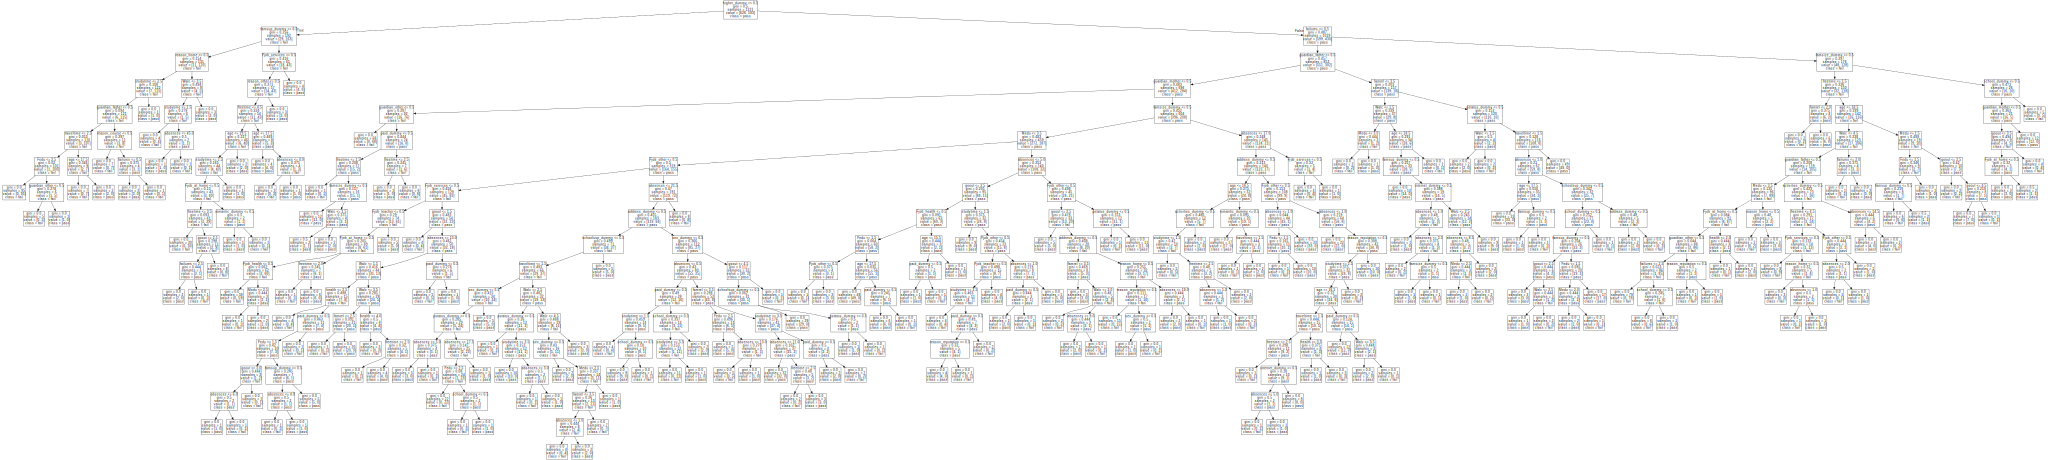

In [61]:
dot_data = tree.export_graphviz(model, feature_names=["school_dummy", "sex_dummy", "age", "address_dummy", "famsize_dummy", 
                     "pstatus_dummy", "Medu", "Fedu", "traveltime", "studytime", 
                     "failures", "schoolsup_dummy", "famsup_dummy", "paid_dummy", 
                     "activities_dummy", "nursery_dummy", "higher_dummy", "internet_dummy", 
                     "romantic_dummy", "famrel", "freetime", "goout", "Walc",
                      "health", "absences", 'Fjob_at_home', 'Fjob_health', 'Fjob_other',
                     'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home',
                     'reason_other', 'reason_reputation', 'guardian_father',
                     'guardian_mother', 'guardian_other'], class_names=['pass', 'fail'])
graph = graphviz.Source(dot_data)
graph

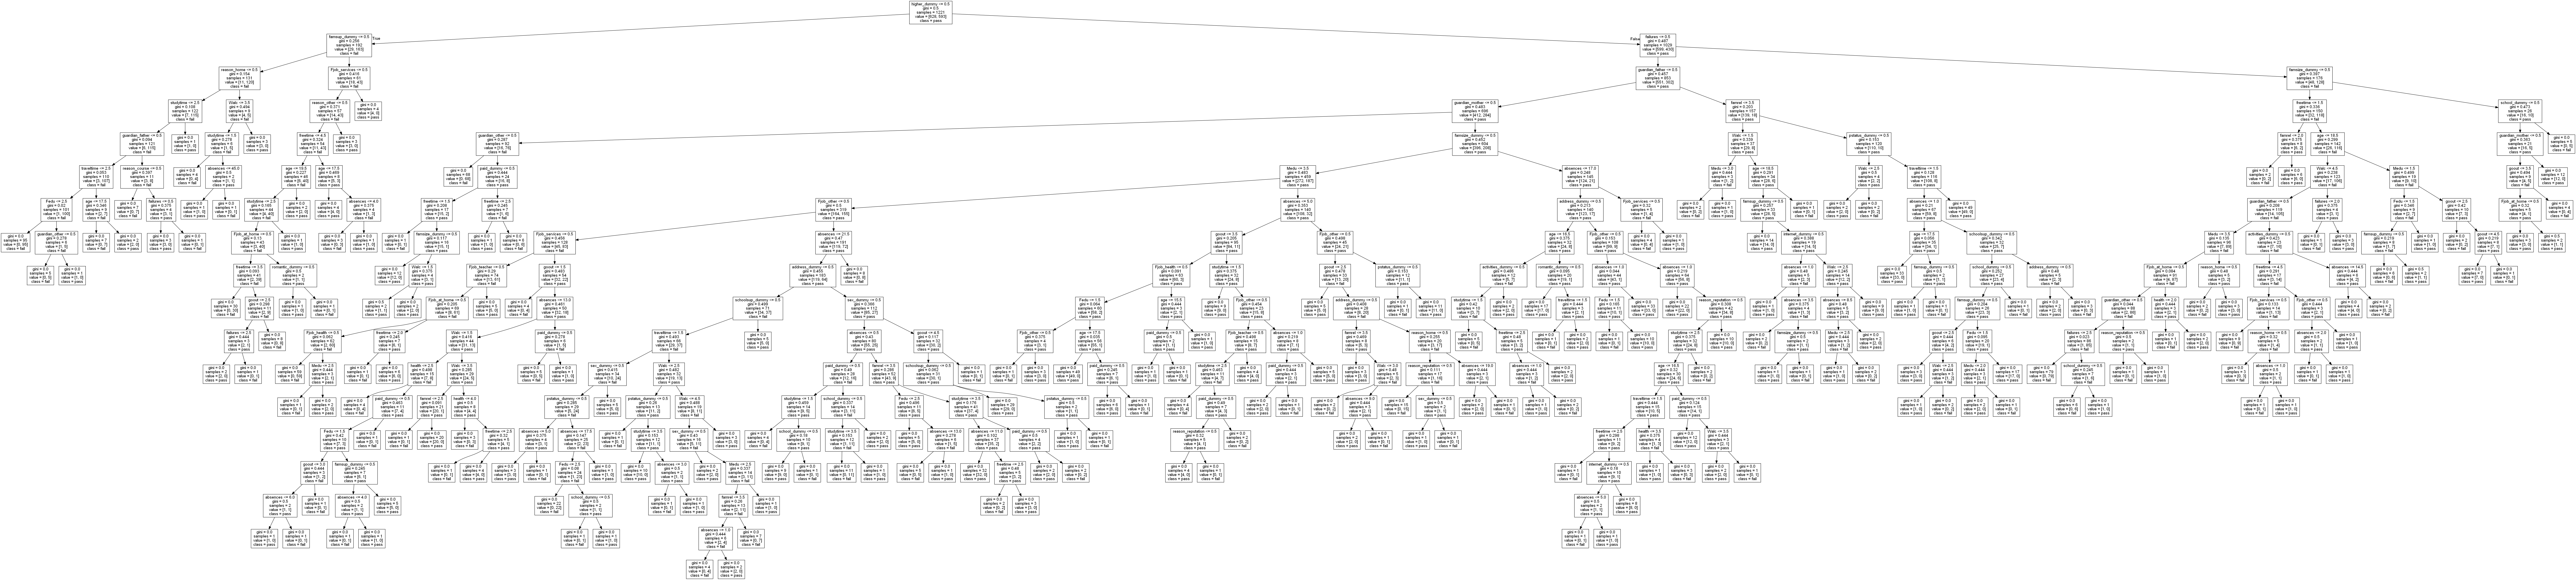

In [62]:
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## Nueral Network

In [63]:
X_train_float = np.asarray(X_train).astype('float32')
y_train_float = np.asarray(y_train).astype('float32').reshape((-1,1))
X_test_float = np.asarray(X_test).astype('float32')
y_test_float = np.asarray(y_test).astype('float32').reshape((-1,1))

X_train_tensor = tf.convert_to_tensor(X_train_float)
y_train_tensor = tf.convert_to_tensor(y_train_float)
X_test_tensor = tf.convert_to_tensor(X_test)
y_test_tensor = tf.convert_to_tensor(y_test)

In [64]:
model = keras.Sequential([
    keras.layers.Dense(400, input_shape=(37,), activation='relu'),
    keras.layers.Dense(200, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='SGD',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train_tensor, y_train_tensor, epochs=250)
y_pred = model.predict_classes(X_test)

Epoch 1/250
39/39 [==============================] - 1s 1ms/step - loss: 0.6899 - accuracy: 0.5442
Epoch 2/250
39/39 [==============================] - 0s 1ms/step - loss: 0.6556 - accuracy: 0.6252
Epoch 3/250
39/39 [==============================] - 0s 1ms/step - loss: 0.6229 - accuracy: 0.6795
Epoch 4/250
39/39 [==============================] - 0s 1ms/step - loss: 0.6073 - accuracy: 0.6668
Epoch 5/250
39/39 [==============================] - 0s 1ms/step - loss: 0.5922 - accuracy: 0.6954
Epoch 6/250
39/39 [==============================] - 0s 1ms/step - loss: 0.5599 - accuracy: 0.7257
Epoch 7/250
39/39 [==============================] - 0s 1ms/step - loss: 0.5704 - accuracy: 0.7191
Epoch 8/250
39/39 [==============================] - 0s 1ms/step - loss: 0.5598 - accuracy: 0.7211
Epoch 9/250
39/39 [==============================] - 0s 1ms/step - loss: 0.5718 - accuracy: 0.7116
Epoch 10/250
39/39 [==============================] - 0s 1ms/step - loss: 0.5502 - accuracy: 0.7249
Epoch 11/

39/39 [==============================] - 0s 1ms/step - loss: 0.4075 - accuracy: 0.8009
Epoch 84/250
39/39 [==============================] - 0s 1ms/step - loss: 0.4275 - accuracy: 0.7749
Epoch 85/250
39/39 [==============================] - 0s 1ms/step - loss: 0.4228 - accuracy: 0.8075
Epoch 86/250
39/39 [==============================] - 0s 1ms/step - loss: 0.4056 - accuracy: 0.8161
Epoch 87/250
39/39 [==============================] - 0s 1ms/step - loss: 0.4210 - accuracy: 0.8047
Epoch 88/250
39/39 [==============================] - 0s 1ms/step - loss: 0.3704 - accuracy: 0.8426
Epoch 89/250
39/39 [==============================] - 0s 1ms/step - loss: 0.3952 - accuracy: 0.8274
Epoch 90/250
39/39 [==============================] - 0s 1ms/step - loss: 0.4020 - accuracy: 0.8415
Epoch 91/250
39/39 [==============================] - 0s 1ms/step - loss: 0.4052 - accuracy: 0.8159
Epoch 92/250
39/39 [==============================] - 0s 1ms/step - loss: 0.3684 - accuracy: 0.8526
Epoch 93/250


39/39 [==============================] - 0s 1ms/step - loss: 0.2418 - accuracy: 0.9028
Epoch 165/250
39/39 [==============================] - 0s 1ms/step - loss: 0.3381 - accuracy: 0.8512
Epoch 166/250
39/39 [==============================] - 0s 1ms/step - loss: 0.2626 - accuracy: 0.8984
Epoch 167/250
39/39 [==============================] - 0s 1ms/step - loss: 0.2493 - accuracy: 0.9045
Epoch 168/250
39/39 [==============================] - 0s 1ms/step - loss: 0.2706 - accuracy: 0.8874
Epoch 169/250
39/39 [==============================] - 0s 1ms/step - loss: 0.2307 - accuracy: 0.9143
Epoch 170/250
39/39 [==============================] - 0s 1ms/step - loss: 0.2578 - accuracy: 0.8986
Epoch 171/250
39/39 [==============================] - 0s 1ms/step - loss: 0.2594 - accuracy: 0.8954
Epoch 172/250
39/39 [==============================] - 0s 1ms/step - loss: 0.3684 - accuracy: 0.8468
Epoch 173/250
39/39 [==============================] - 0s 1ms/step - loss: 0.2387 - accuracy: 0.9022
Epoc

39/39 [==============================] - 0s 1ms/step - loss: 0.1546 - accuracy: 0.9390
Epoch 246/250
39/39 [==============================] - 0s 1ms/step - loss: 0.1370 - accuracy: 0.9524
Epoch 247/250
39/39 [==============================] - 0s 1ms/step - loss: 0.1690 - accuracy: 0.9455
Epoch 248/250
39/39 [==============================] - 0s 1ms/step - loss: 0.1430 - accuracy: 0.9482
Epoch 249/250
39/39 [==============================] - 0s 1ms/step - loss: 0.2448 - accuracy: 0.9051
Epoch 250/250
39/39 [==============================] - 0s 1ms/step - loss: 0.1730 - accuracy: 0.9412


C:\Users\alexm\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [65]:
results = model.evaluate(X_test_tensor, y_test_tensor)
print("******* Metrics for Nueral Network ***********")
metrics_df = metrics(y_test, np.rint(y_pred), 'Neural Network', metrics_df, False)

13/13 [==============================] - 0s 1ms/step - loss: 0.4245 - accuracy: 0.8108
******* Metrics for Nueral Network ***********
Accuracy: 0.8108108108108109
Precision: 0.8564356435643564
Recall: 0.7828054298642534
F1 Score 0.8179669030732861
Classification Report:
              precision    recall  f1-score   support

        pass       0.77      0.84      0.80       186
        fail       0.86      0.78      0.82       221

    accuracy                           0.81       407
   macro avg       0.81      0.81      0.81       407
weighted avg       0.82      0.81      0.81       407

Confusion Matrix:
[[157  29]
 [ 48 173]]


## Logistic Regression

In [66]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [67]:
y_pred = model.predict(X_test)

In [68]:
print("******* Metrics for Logistic Regression ***********")
metrics_df = metrics(y_test, y_pred, 'Logistic Regression', metrics_df, False)

******* Metrics for Logistic Regression ***********
Accuracy: 0.8157248157248157
Precision: 0.8686868686868687
Recall: 0.7782805429864253
F1 Score 0.8210023866348449
Classification Report:
              precision    recall  f1-score   support

        pass       0.77      0.86      0.81       186
        fail       0.87      0.78      0.82       221

    accuracy                           0.82       407
   macro avg       0.82      0.82      0.82       407
weighted avg       0.82      0.82      0.82       407

Confusion Matrix:
[[160  26]
 [ 49 172]]


## Ensemble Methods: Random Forest

In [69]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

RandomForestClassifier()

In [70]:
y_pred = model.predict(X_test)

In [71]:
print("******* Metrics for Random Forest ***********")
metrics_df = metrics(y_test, y_pred, 'Random Forest', metrics_df, False)

******* Metrics for Random Forest ***********
Accuracy: 0.8181818181818182
Precision: 0.8209606986899564
Recall: 0.8506787330316742
F1 Score 0.8355555555555556
Classification Report:
              precision    recall  f1-score   support

        pass       0.81      0.78      0.80       186
        fail       0.82      0.85      0.84       221

    accuracy                           0.82       407
   macro avg       0.82      0.82      0.82       407
weighted avg       0.82      0.82      0.82       407

Confusion Matrix:
[[145  41]
 [ 33 188]]


## Support Vector Machines

In [72]:
svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge", max_iter=100000)),
])

svm_clf.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge', max_iter=100000))])

In [73]:
y_pred = svm_clf.predict(X_test)

In [74]:
print("******* Metrics for SVM ***********")
metrics_df = metrics(y_test, y_pred, 'SVM', metrics_df, False)

******* Metrics for SVM ***********
Accuracy: 0.8304668304668305
Precision: 0.9175824175824175
Recall: 0.755656108597285
F1 Score 0.8287841191066997
Classification Report:
              precision    recall  f1-score   support

        pass       0.76      0.92      0.83       186
        fail       0.92      0.76      0.83       221

    accuracy                           0.83       407
   macro avg       0.84      0.84      0.83       407
weighted avg       0.85      0.83      0.83       407

Confusion Matrix:
[[171  15]
 [ 54 167]]


## Metrics comparison between models

In [75]:
metrics_df

,model,accuracy,precision,recall,f1 score,includes G1/G2
0,Decision Tree,0.918919,0.919643,0.932127,0.925843,True
1,Neural Network,0.948403,0.946429,0.959276,0.952809,True
2,Logistic Regression,0.948403,0.954545,0.950226,0.952381,True
3,Random Forest,0.953317,0.950893,0.963801,0.957303,True
4,SVM,0.945946,0.946188,0.954751,0.950450,True
5,Decision Tree,0.737101,0.756757,0.760181,0.758465,False
6,Neural Network,0.810811,0.856436,0.782805,0.817967,False
7,Logistic Regression,0.815725,0.868687,0.778281,0.821002,False
8,Random Forest,0.818182,0.820961,0.850679,0.835556,False
9,SVM,0.830467,0.917582,0.755656,0.828784,False
